# Pathway profiles

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import scipy.interpolate as intpol
from pylab import figure, text, scatter, show
import sys, math, numpy
import seaborn as sns
sns.set_theme()

In [2]:
def load_paths(sysname, pathname, theory):
    '''
    Load pathways.
    
    sysname:  'toho_amp', 'toho_cex';
    pathname: 'r1-ae', 'r2-ae', 'ae-r1', 'ae-r2';
    theory:   'dftb3', 'b3lyp';
    '''
    
    basedir='../../1.sampling'
    
    pathdir=None
    if sysname == 'toho_amp':
        if pathname == 'r1-ae':
                pathdir='/0.toho_amp.r1/9.paths.sp'
        elif pathname == 'r2-ae':
                pathdir='/1.toho_amp.r2/9.paths.sp'
        elif pathname == 'ae-r1':
                pathdir='/2.toho_amp.ae/9a.r1.paths.sp'
        elif pathname == 'ae-r2':
                pathdir='/2.toho_amp.ae/9b.r2.paths.sp'
        
    elif sysname == 'toho_cex':
        if pathname ==  'r1-ae':
                pathdir='/3.toho_cex.r1/9.paths.sp'
        elif pathname == 'r2-ae':
                pathdir='/4.toho_cex.r2/9.paths.sp'
        elif pathname == 'ae-r1':
                pathdir='/5.toho_cex.ae/9a.r1.paths.sp'
        elif pathname == 'ae-r2':
                pathdir='/5.toho_cex.ae/9b.r2.paths.sp'
    
    theorydir=None
    
    if theory == 'dftb3':
            theorydir='/0.dftb3'
    elif theory == 'b3lyp':
            theorydir='/1.b3lyp'
            
    if pathdir != None and theorydir != None:
        enedir=basedir+pathdir+theorydir
    else:
        print('Bad dir selection. \nCheck vars: sysname, pathname, theory')
        return None
    
    path_enedir=enedir+'/path.ene'
    
    ## read all paths
    paths = []
    lines = open(path_enedir, 'r', ).readlines()
    
    for line in lines:
        words = line.split()
        
        if words[0][0] == 'f':
            paths.append(
                [float(words[w].replace(',','')) for w in range(1, len(words))]
            )
            
    if len(paths) != 0:
        return numpy.asarray(paths)
    else:
        print('Bad data loading.')
        return None

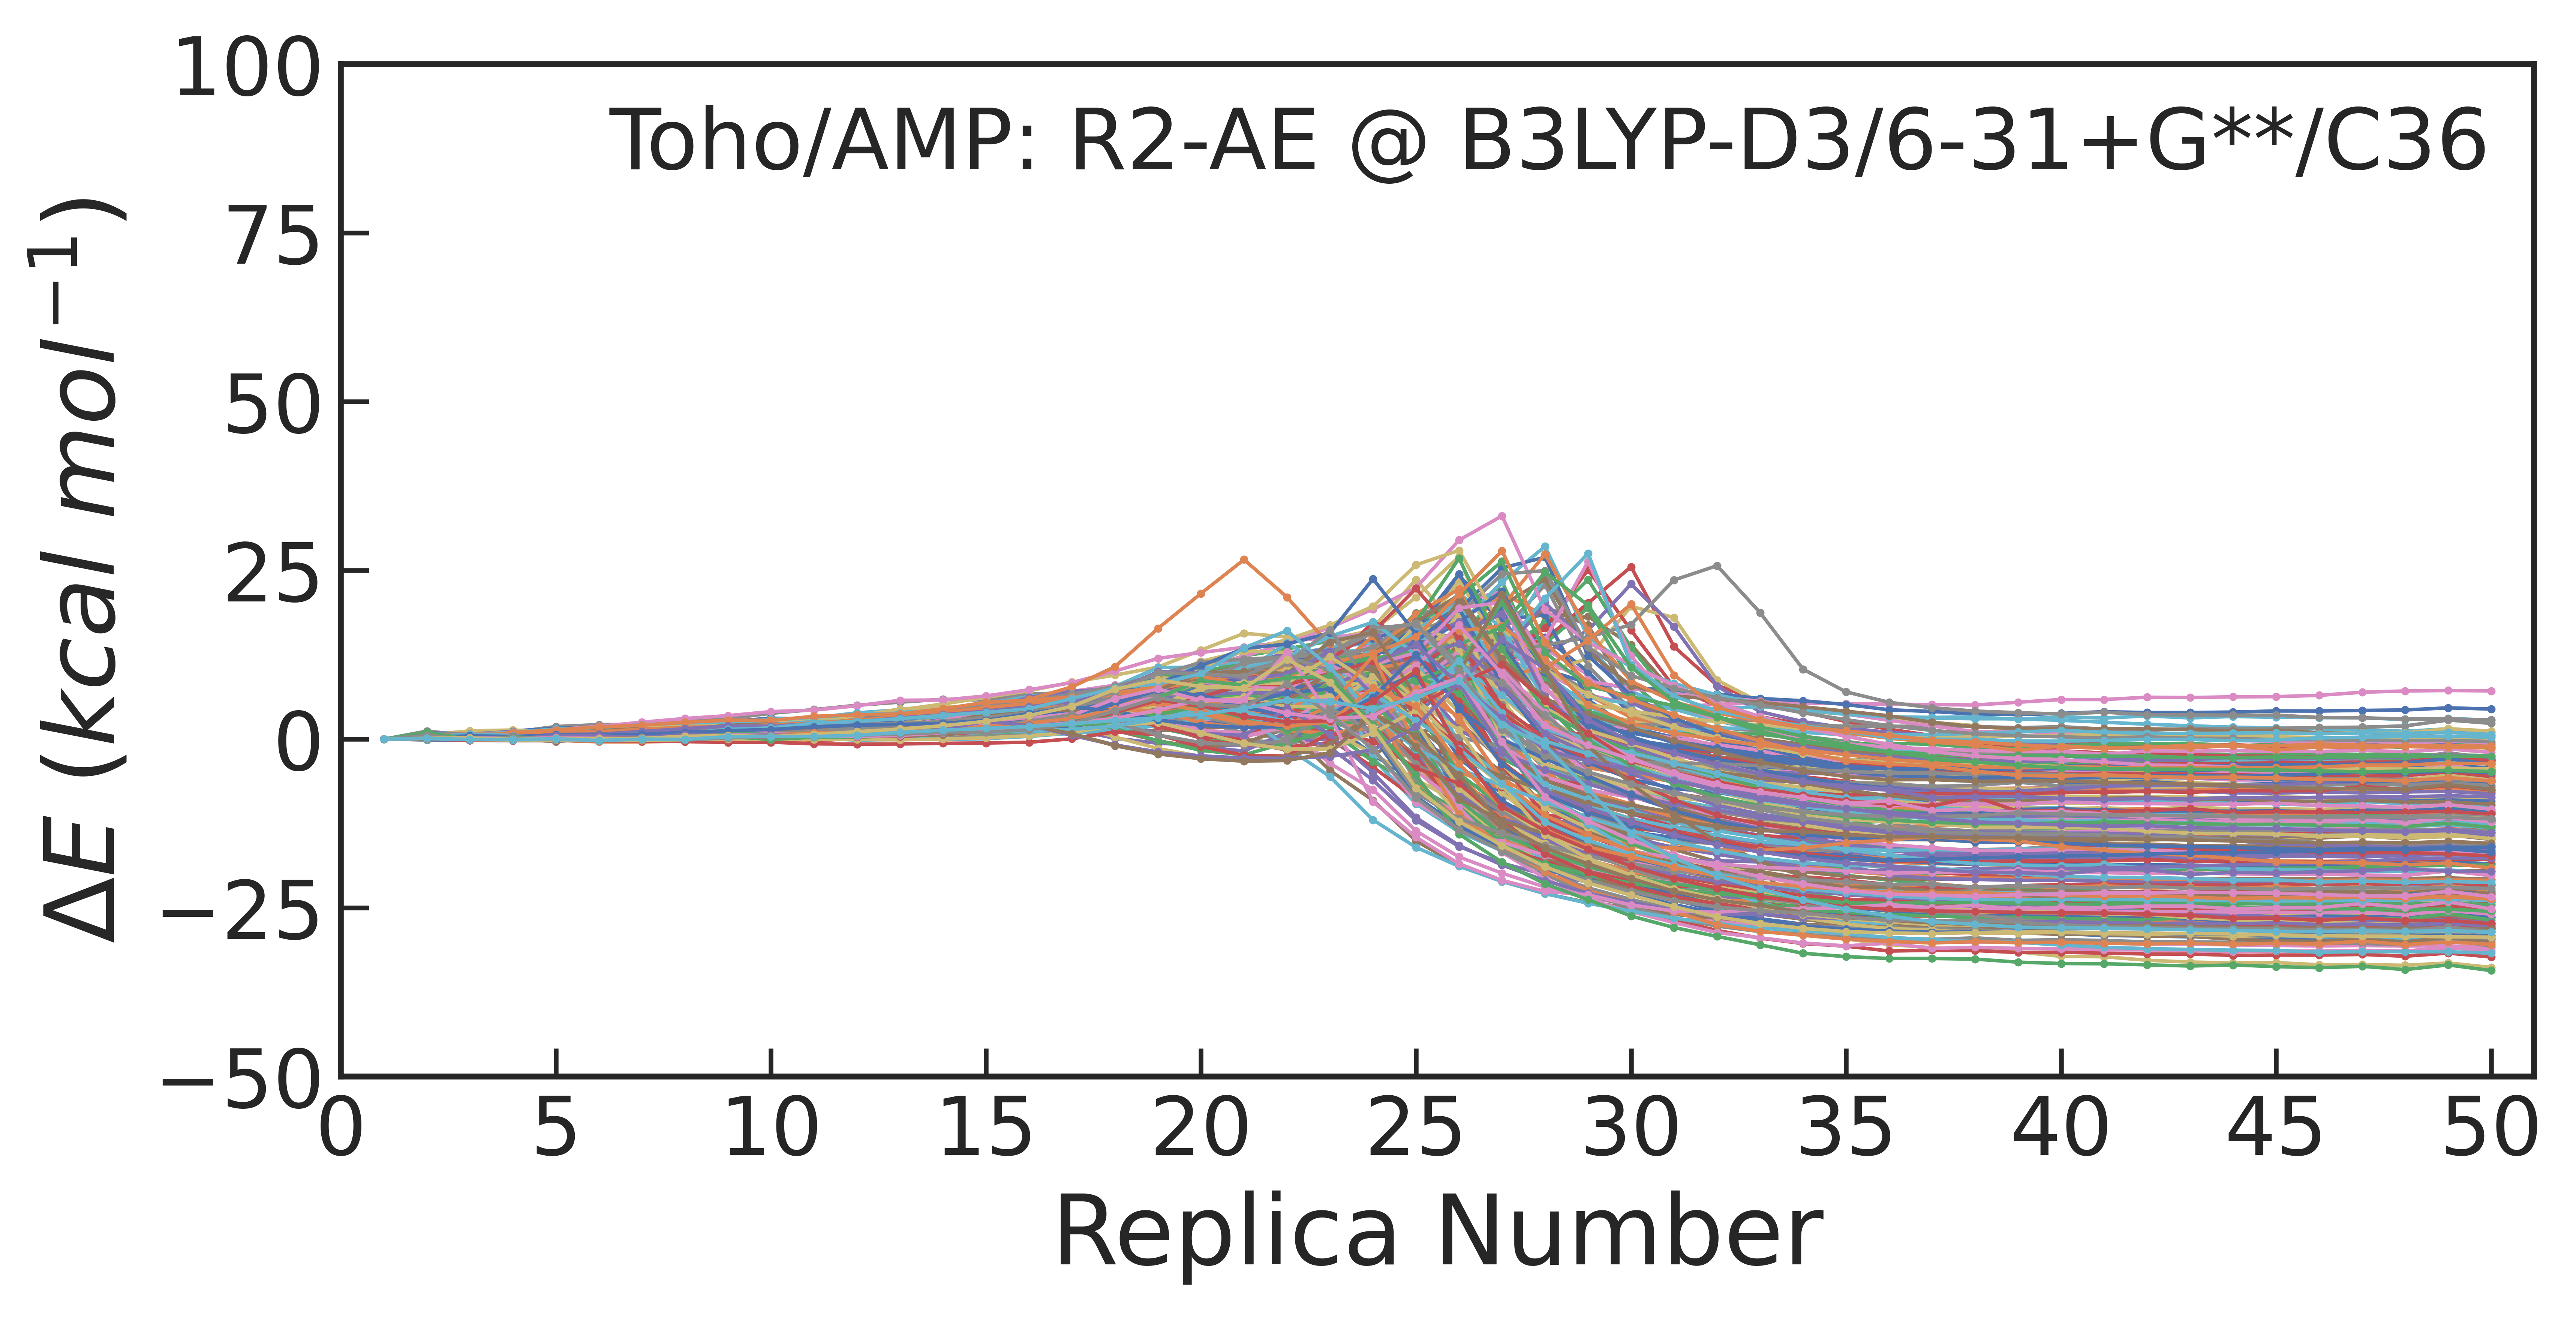

In [7]:
# init figure ==================================================================
sns.set_style(style='white')
sns.set_style("ticks")

fig, ax,  = plt.subplots(figsize=(8, 4.5), dpi=900, facecolor='w', edgecolor='k', )
plt.subplots_adjust(left=1/8, right=7.5/8, top=4/4.5, bottom=1/4.5)

# spine    
ax.set_xlim(0, 51)
ax.set_ylim(-50, 100)

ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.yaxis.set_major_locator(plt.MultipleLocator(10))
plt.xticks([5*x for x in range(11)])
plt.yticks([y for y in range(-50, 101, 25)])

ax.set_xlabel(r'Replica Number', fontsize='xx-large', )
ax.set_ylabel(r'$\Delta$$E$'+r' $(kcal$ $mol^{-1})$', fontsize='xx-large', )

# tick & labels on x and y
ax.tick_params(which='major', direction='in', length=6, width=1, labelsize='x-large', )

# load dftb data ================================================================
sysname='toho_amp'
pathname='r2-ae'
theoryname='b3lyp'


paths1 = load_paths(sysname, pathname, theoryname, )
paths2 = load_paths(sysname, pathname.split('-')[1]+'-'+pathname.split('-')[0], theoryname, )
paths = numpy.concatenate( (paths1, paths2), axis=0, )

tname = 'B3LYP-D3/6-31+G**/C36' if theoryname == 'b3lyp' else 'DFTB3/3OB/C36'

ax.text(0.98, 0.96,
        sysname[0].upper() + sysname[1:4].lower() + sysname[4:].replace('_', '/').upper() + ': ' + pathname[:2].upper() + pathname[2:].upper()+' @ '+tname, 
        ha='right', va='top', transform=ax.transAxes, fontsize=18)

for p in range(200):
    ax.plot([x for x in range(1, 51)], paths[p], ls='-', marker='.', markersize=1.5, linewidth=0.75, )

# ax.plot([0, 50], [mean, mean], c=colors[0], ls='-', linewidth=1, zorder=1, )
# ax.plot([0, 50], [exav, exav], c=colors[1], ls='-', linewidth=1, zorder=1, )

fig.savefig('{2}.{0}_{1}.png'.format(sysname, pathname, theoryname, ))
plt.show()